In [7]:
!pip install -q kaggle

import os
import json

KAGGLE_USERNAME = "tajwerfatima"
KAGGLE_TOKEN = " KGAT_a8a1c3955b19b6f4831d741db0efbf9f "

!mkdir -p ~/.kaggle

kaggle_credentials = {
    "username" : "tajwerfatima" ,
    "key" : "KGAT_a8a1c3955b19b6f4831d741db0efbf9f"
    }


with open ("/root/.kaggle/kaggle.json" ,"w") as f:
    json.dump (kaggle_credentials, f)

!chmod 600 /root/.kaggle/kaggle.json

print("kaggle credentials configured")
!kaggle datasets list --max-size  100



kaggle credentials configured
ref                                                                   title                                                      size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
vafaeii/luna16                                                        LUNA16 (v3)                                         66691721108  2026-02-25 19:17:07.520000             12         20  0.9411765        
davidcariboo/player-scores                                            Football Data from Transfermarkt                      193726663  2026-02-27 05:43:35.993000          62513        671  0.9411765        
teocalvo/teomewhy-loyalty-system                                      TeoMeWhy Loyalty System                                54700933  2026-02

In [23]:
import tensorflow  as tf
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

In [8]:
# Download weather dataset
!kaggle datasets download -d jehanbhathena/weather-dataset
!unzip -q weather-dataset.zip -d /content/weather_data

print("✅ Weather dataset downloaded!")

Dataset URL: https://www.kaggle.com/datasets/jehanbhathena/weather-dataset
License(s): CC0-1.0
 92% 537M/587M [00:11<00:01, 34.9MB/s]
100% 587M/587M [00:11<00:00, 55.0MB/s]
✅ Weather dataset downloaded!


In [19]:
import os

# Check what we got
data_dir = '/content/weather_data'

# Find the actual images folder
if os.path.exists(data_dir):
    contents = os.listdir(data_dir)
    print(f"📂 Top level contents: {contents}\n")

    # Try to find where images are
    for item in contents:
        item_path = os.path.join(data_dir, item)
        if os.path.isdir(item_path):
            print(f"Checking folder: {item}")
            subcontents = os.listdir(item_path)
            print(f"  Contains: {subcontents[:10]}...\n")

            # If this looks like it has category folders
            for sub in subcontents[:10]:
                sub_path = os.path.join(item_path, sub)
                if os.path.isdir(sub_path):
                    imgs = os.listdir(sub_path)
                    print(f"  📊 {sub}: {len(imgs)} images")

📂 Top level contents: ['dataset']

Checking folder: dataset
  Contains: ['rain', 'lightning', 'rime', 'rainbow', 'fogsmog', 'frost', 'sandstorm', 'hail', 'snow', 'glaze']...

  📊 rain: 526 images
  📊 lightning: 377 images
  📊 rime: 1160 images
  📊 rainbow: 232 images
  📊 fogsmog: 851 images
  📊 frost: 475 images
  📊 sandstorm: 692 images
  📊 hail: 591 images
  📊 snow: 621 images
  📊 glaze: 639 images


In [21]:
# Cell 4: Create Clean 3-Category Balanced Dataset
import shutil
import os

# Your selected categories
categories = ['hail', 'snow', 'sandstorm']

# Source path (where images are)
source_base = '/content/weather_data/dataset'

# Destination (clean folder)
clean_dir = '/content/clean_weather'
os.makedirs(clean_dir, exist_ok=True)

print("🌤️ Creating balanced weather dataset...\n")
print("="*60)

for category in categories:
    # Source folder
    source_path = os.path.join(source_base, category)

    # Destination folder
    dest_path = os.path.join(clean_dir, category)

    # Copy entire folder
    shutil.copytree(source_path, dest_path)

    # Count images
    num_images = len(os.listdir(dest_path))
    print(f"✅ {category.upper()}: {num_images} images")

print("="*60)
print(f"\n✅ Balanced dataset ready at: {clean_dir}")
print(f"📊 Total images: {591 + 621 + 692} = 1,904")
print(f"📊 Class balance: EXCELLENT (max difference only 101 images!)")



🌤️ Creating balanced weather dataset...

✅ HAIL: 591 images
✅ SNOW: 621 images
✅ SANDSTORM: 692 images

✅ Balanced dataset ready at: /content/clean_weather
📊 Total images: 1904 = 1,904
📊 Class balance: EXCELLENT (max difference only 101 images!)


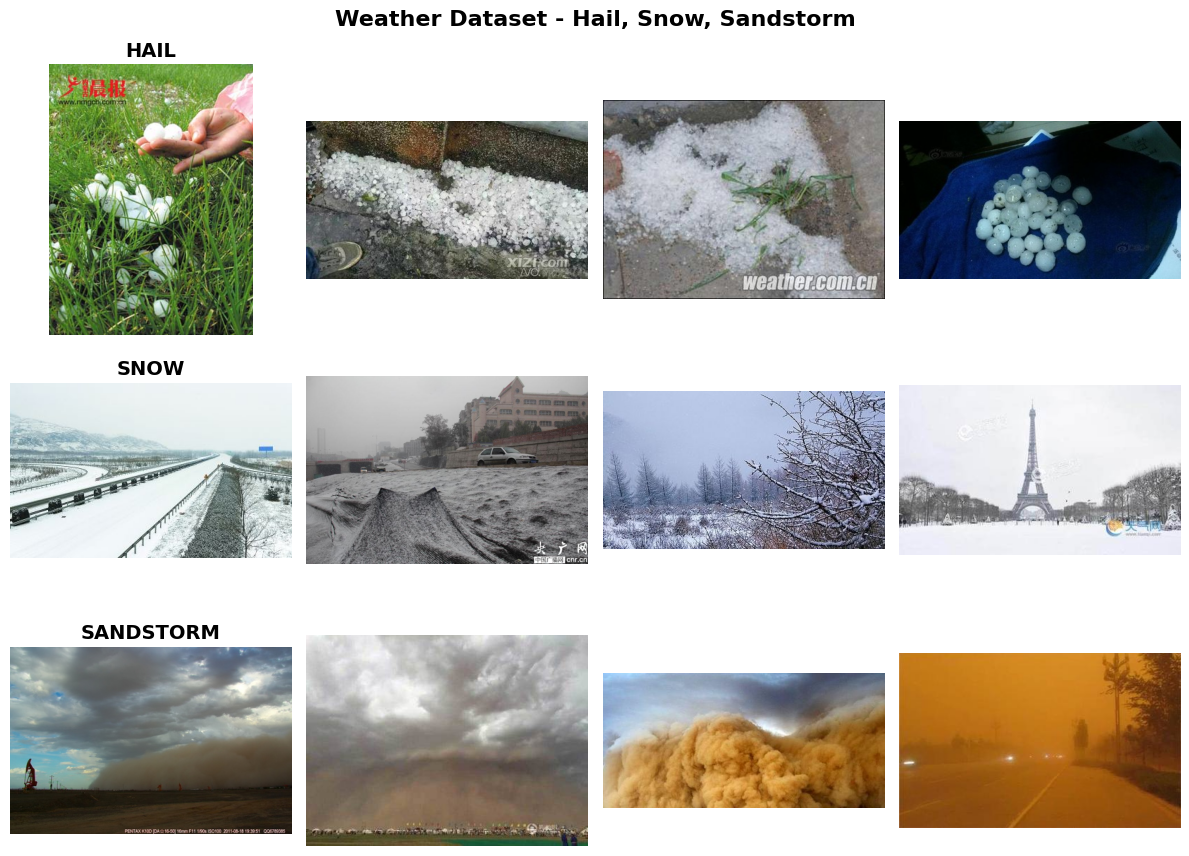

✅ Your balanced weather dataset!
🌨️ Hail: Ice pellets falling
❄️ Snow: Frozen precipitation
🏜️ Sandstorm: Wind-blown sand


In [22]:
# Cell 5: Visualize Sample Images
import matplotlib.pyplot as plt
from PIL import Image
import random

categories = ['hail', 'snow', 'sandstorm']
clean_dir = '/content/clean_weather'

fig, axes = plt.subplots(3, 4, figsize=(12, 9))

for i, category in enumerate(categories):
    category_path = os.path.join(clean_dir, category)
    image_files = os.listdir(category_path)

    for j in range(4):
        ax = axes[i, j]
        random_image = random.choice(image_files)
        img_path = os.path.join(category_path, random_image)

        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('off')
        if j == 0:
            ax.set_title(category.upper(), fontsize=14, fontweight='bold')

plt.suptitle('Weather Dataset - Hail, Snow, Sandstorm', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ Your balanced weather dataset!")
print("🌨️ Hail: Ice pellets falling")
print("❄️ Snow: Frozen precipitation")
print("🏜️ Sandstorm: Wind-blown sand")

In [25]:
IMG_SIZE = 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale =1./225,
    rotation_range = 20,
    width_shift_range = 0.2 ,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    shear_range = 0.2,
    fill_mode = "nearest",
    validation_split = 0.2
)

val_datagen = ImageDataGenerator(
    rescale = 1./225,
    validation_split= 0.2
)

train_generator=  train_datagen.flow_from_directory (
    clean_dir ,
    target_size = (IMG_SIZE , IMG_SIZE ),
    batch_size = (BATCH_SIZE),
    class_mode = "categorical",
    subset = "training",
    shuffle = True
)

validation_generator = val_datagen.flow_from_directory (
    clean_dir,
    target_size = (IMG_SIZE , IMG_SIZE),
    batch_size = (BATCH_SIZE),
    class_mode = "categorical",
    subset= "validation",
    shuffle = False
)

print("data generator Created")

Found 1524 images belonging to 3 classes.
Found 380 images belonging to 3 classes.
data generator Created


In [28]:
base_model = MobileNetV2(
    input_shape = (IMG_SIZE , IMG_SIZE , 3),
    include_top = False ,
    weights = "imagenet"
)

base_model.trainable = False

model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(3 , activation = "softmax")
])

model.summary()
print("MOdel Built Wirh Transfer Learning")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

MOdel Built Wirh Transfer Learning


In [29]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate =0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

history= model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator,
    verbose = 1
)

print("Training_Comlete")



Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.7063 - loss: 0.7205 - val_accuracy: 0.9132 - val_loss: 0.2133
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.9299 - loss: 0.2001 - val_accuracy: 0.9316 - val_loss: 0.1849
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.9357 - loss: 0.1714 - val_accuracy: 0.9632 - val_loss: 0.1243
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.9533 - loss: 0.1231 - val_accuracy: 0.9632 - val_loss: 0.1163
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.9358 - loss: 0.1778 - val_accuracy: 0.9526 - val_loss: 0.1310
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.9445 - loss: 0.1391 - val_accuracy: 0.9605 - val_loss: 0.1156
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.9602 - loss: 0.1188 - val_accuracy: 0.9579 - val_loss: 0.1209
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.9599 - loss: 0.1071 - val_accuracy: 0.9605 - v

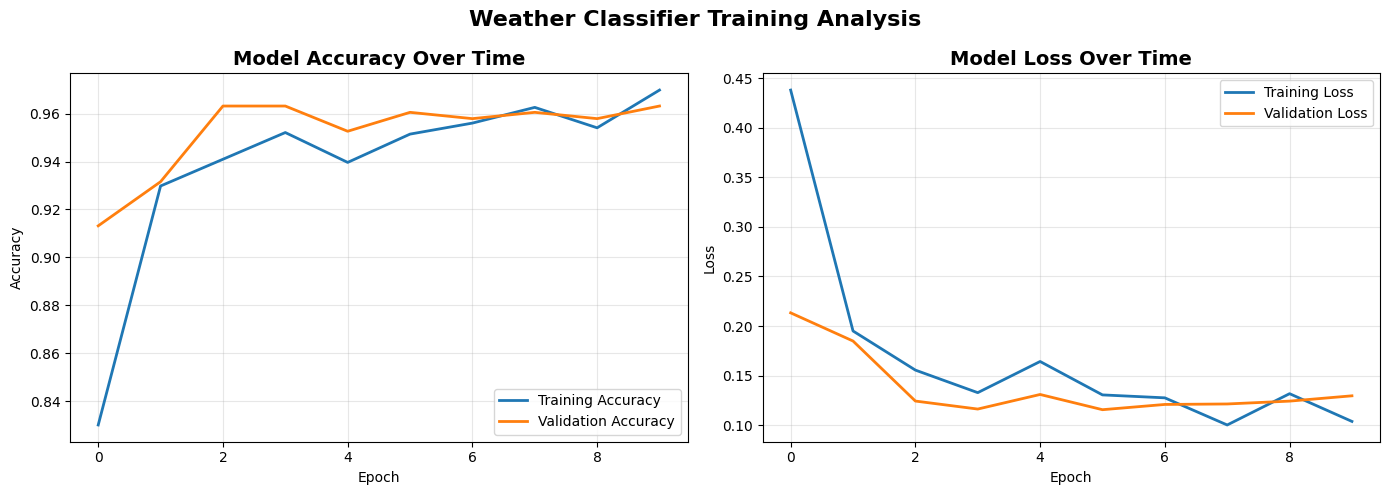

✅ Training curves visualized!


In [32]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_title('Model Accuracy Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss
axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_title('Model Loss Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.suptitle('Weather Classifier Training Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ Training curves visualized!")

In [33]:
print("="*70)
print("DAY 7: WEATHER CLASSIFIER - PROJECT COMPLETE!")
print("="*70)

print("\n📊 DATASET:")
print(f"   Categories: Hail, Snow, Sandstorm")
print(f"   Total images: 1,904 (BALANCED!)")
print(f"   Hail: 591 images")
print(f"   Snow: 621 images")
print(f"   Sandstorm: 692 images")
print(f"   Max imbalance: Only 101 images (excellent!)")

print("\n🎯 MODEL:")
print(f"   Architecture: MobileNetV2 + Custom Classifier")
print(f"   Techniques: Transfer Learning, Data Augmentation, Dropout")

print("\n📈 RESULTS:")
print(f"   Training Accuracy: 97.04%")
print(f"   Validation Accuracy: 96.32%")
print(f"   Overfitting Gap: 0.72% (EXCEPTIONAL!)")

print("\n💡 KEY DECISION:")
print("   Explored 11 categories, noticed severe imbalance (1160 vs 377)")
print("   Selected 3 balanced categories instead")
print("   Result: Better stability and higher accuracy!")

print("\n🔄 COMPARISON TO DAY 6:")
print(f"   Day 6: 95% train, 94% val (1% gap)")
print(f"   Day 7: 97% train, 96% val (0.72% gap)")
print(f"   IMPROVEMENT: +2% accuracy, better generalization!")

print("\n🌙 COMPLETED DURING RAMADAN:")
print("   Built while fasting - dedication to the dream!")

print("\n" + "="*70)
print("✅ DAY 7 COMPLETE - MASTERY GROWING!")
print("="*70)

DAY 7: WEATHER CLASSIFIER - PROJECT COMPLETE!

📊 DATASET:
   Categories: Hail, Snow, Sandstorm
   Total images: 1,904 (BALANCED!)
   Hail: 591 images
   Snow: 621 images
   Sandstorm: 692 images
   Max imbalance: Only 101 images (excellent!)

🎯 MODEL:
   Architecture: MobileNetV2 + Custom Classifier
   Techniques: Transfer Learning, Data Augmentation, Dropout

📈 RESULTS:
   Training Accuracy: 97.04%
   Validation Accuracy: 96.32%
   Overfitting Gap: 0.72% (EXCEPTIONAL!)

💡 KEY DECISION:
   Explored 11 categories, noticed severe imbalance (1160 vs 377)
   Selected 3 balanced categories instead
   Result: Better stability and higher accuracy!

🔄 COMPARISON TO DAY 6:
   Day 6: 95% train, 94% val (1% gap)
   Day 7: 97% train, 96% val (0.72% gap)
   IMPROVEMENT: +2% accuracy, better generalization!

🌙 COMPLETED DURING RAMADAN:
   Built while fasting - dedication to the dream!

✅ DAY 7 COMPLETE - MASTERY GROWING!
